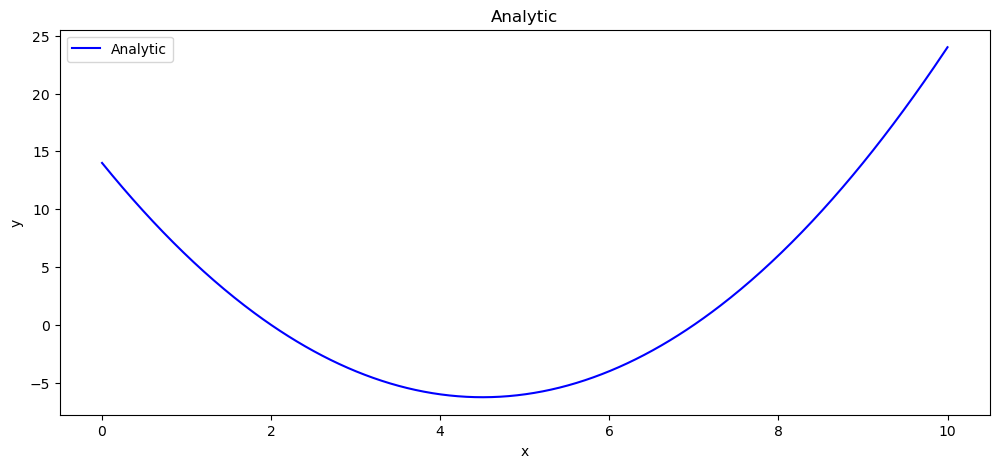

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

f_true = lambda x: x**2 - 9*x + 14

sigma = 2

X_test = np.linspace(0,10,500)

Y_true = np.array([f_true(xt) for xt in X_test])


# Plotting
plt.figure(figsize=(12, 5))
plt.plot(X_test, Y_true, label="Analytic", color="blue")


plt.title(f"Analytic")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# fig_name = f"c1_pce_{n}p{degree}d"
# plt.savefig('figs/'+fig_name)
plt.show()


In [2]:
# data generation
X_train = np.arange(0,11,2)

n = len(X_train)
num_rep = 10
X_train = X_train.repeat(num_rep)
# Y_train = f_true(X_train) + sigma * np.random.normal(loc=0, scale=sigma, size=n)  # Training outputs
Y_train = f_true(X_train) + sigma * np.random.normal(loc=0, scale=sigma, size=n*num_rep)  # Training outputs

In [3]:
import GPy

# Define the kernel
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

# Create the GP model
gp_model_gpy = GPy.models.GPRegression(X_train.reshape(-1,1), Y_train.reshape(-1,1), kernel)

# Optimize the model (find the best hyperparameters)
gp_model_gpy.optimize(messages=True)

# Print the optimized model's parameter values
print(gp_model_gpy)



Name : GP regression
Objective : 181.59250590176956
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |     150.3576133436999  |      +ve      |        
  rbf.lengthscale          |  5.98247188564368e-10  |      +ve      |        
  Gaussian_noise.variance  |     15.77532495585194  |      +ve      |        


In [4]:
gp_model_gpy.predict(np.array([5]).reshape(-1,1))

(array([[0.]]), array([[166.1329]]))

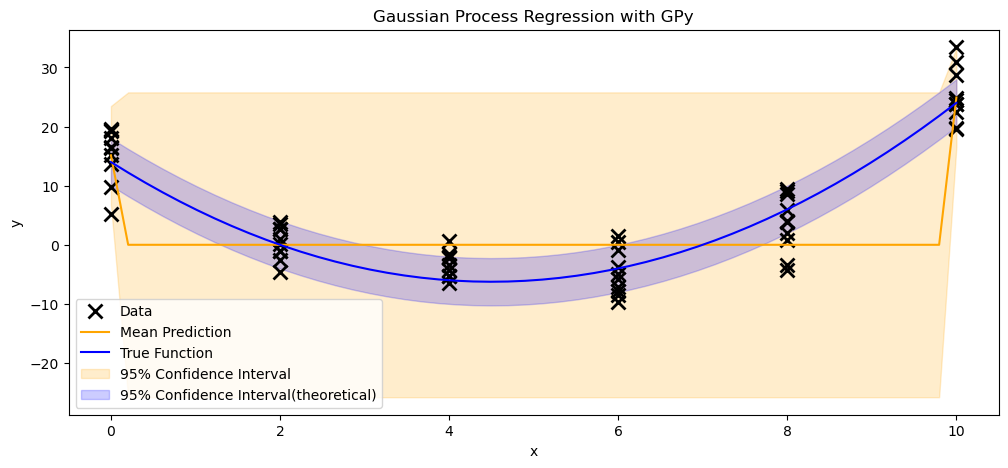

In [5]:
# Predict at new data points
X_new = np.linspace(0, 10, 50).reshape(-1, 1)  # Test inputs
Y_pred, Y_var = gp_model_gpy.predict(X_new)  # Predictive mean and variance
Y_true = np.array([f_true(xn) for xn in X_new])

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(X_train, Y_train, 'kx', markersize=10, markeredgewidth=2, label="Data")

plt.plot(X_new, Y_pred, label='Mean Prediction', color='orange')
plt.plot(X_new, Y_true, label="True Function", color="blue")
plt.fill_between(X_new.flatten(), (Y_pred - 2*np.sqrt(Y_var)).flatten(), (Y_pred + 2*np.sqrt(Y_var)).flatten(), color='orange',
                 alpha=0.2, label='95% Confidence Interval')
plt.fill_between(X_new.flatten(), (Y_true - 2*sigma).flatten(), (Y_true + 2*sigma).flatten(), color='blue',
                 alpha=0.2, label='95% Confidence Interval(theoretical)')
plt.title(f"Gaussian Process Regression with GPy")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [6]:
print(list(zip(X_train, Y_train)))

[(0, 18.04693049152124), (0, 16.541927968889407), (0, 19.428766899116713), (0, 9.7293275901563), (0, 19.180933860909366), (0, 15.151886239681806), (0, 13.72755566679535), (0, 19.61578344778537), (0, 16.400415854263287), (0, 5.125557655943975), (2, 2.619792209440557), (2, -2.5496447371638884), (2, 0.06702382315640215), (2, -4.577579176610924), (2, 2.6223120258525774), (2, -0.9940375133465855), (2, -1.1037817266798156), (2, 3.478721822103583), (2, 3.9284650325254273), (2, 1.011197570634649), (4, -4.213780226603864), (4, 0.5800565237124111), (4, -6.38930851741803), (4, -1.520679217215898), (4, -5.343955579875409), (4, -2.0508467323539255), (4, -2.0351440445184026), (4, -3.4986951562640596), (4, -2.208132717230637), (4, -5.230210653407719), (6, 1.5082948074732858), (6, -3.6731556626734814), (6, -9.710963210033759), (6, -8.406848717097565), (6, 0.5271641265543492), (6, -7.079700782900897), (6, -7.772717686310418), (6, -4.856708900654616), (6, -0.8175073439448739), (6, -5.7752118149116365), 

In [7]:
def rbf_kernel(X1, X2, sigma_f=1., length_scale=1.):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

sigma_noise = 1
K = rbf_kernel(X_train.reshape(-1,1), X_train.reshape(-1,1), sigma_f=1, length_scale=1) + sigma_noise**2 * np.eye(len(X_train))
print(K)

[[2.0000e+00 1.0000e+00 1.0000e+00 ... 1.9287e-22 1.9287e-22 1.9287e-22]
 [1.0000e+00 2.0000e+00 1.0000e+00 ... 1.9287e-22 1.9287e-22 1.9287e-22]
 [1.0000e+00 1.0000e+00 2.0000e+00 ... 1.9287e-22 1.9287e-22 1.9287e-22]
 ...
 [1.9287e-22 1.9287e-22 1.9287e-22 ... 2.0000e+00 1.0000e+00 1.0000e+00]
 [1.9287e-22 1.9287e-22 1.9287e-22 ... 1.0000e+00 2.0000e+00 1.0000e+00]
 [1.9287e-22 1.9287e-22 1.9287e-22 ... 1.0000e+00 1.0000e+00 2.0000e+00]]


In [8]:
L = np.linalg.cholesky(K)
print(L)

[[1.4142e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [7.0711e-01 1.2247e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [7.0711e-01 4.0825e-01 1.1547e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.3638e-22 7.8741e-23 5.5678e-23 ... 1.0605e+00 0.0000e+00 0.0000e+00]
 [1.3638e-22 7.8741e-23 5.5678e-23 ... 1.1761e-01 1.0540e+00 0.0000e+00]
 [1.3638e-22 7.8741e-23 5.5678e-23 ... 1.1761e-01 1.0522e-01 1.0487e+00]]


In [9]:
z = np.linalg.solve(L, Y_train)
w = np.linalg.solve(L.T, z)
print(w)

[ 4.1553  2.6503  5.5371 -4.1623  5.2893  1.2602 -0.1641  5.7241  2.5088
 -8.7661  2.066  -3.1034 -0.4867 -5.1313  2.0686 -1.5478 -1.6575  2.925
  3.3747  0.4574 -1.251   3.5429 -3.4265  1.4421 -2.3811  0.912   0.9277
 -0.5359  0.7547 -2.2674  5.7112  0.5298 -5.508  -4.2039  4.7301 -2.8768
 -3.5698 -0.6538  3.3854 -1.5723  5.9268  0.3337  5.095  -2.7318  0.4734
 -7.7807 -6.9622 -1.4844  5.7092  2.3565 -3.3353 -3.1511  1.5734 -0.5161
  8.0874  0.8428 10.5227  5.8742  1.9058  0.9613]


In [10]:
# Let's predict a trained point x=2
xt1 = 5
k1= rbf_kernel(X_train.reshape(-1, 1), np.array([xt1]).reshape(-1, 1))
y_pred1 = np.dot(k1.T, w)
print(k1)

[[3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [6.0653e-01]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [1.1109e-02]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]
 [3.7267e-06]]


In [11]:
print(w), print(y_pred1), print(f_true(xt1))

[ 4.1553  2.6503  5.5371 -4.1623  5.2893  1.2602 -0.1641  5.7241  2.5088
 -8.7661  2.066  -3.1034 -0.4867 -5.1313  2.0686 -1.5478 -1.6575  2.925
  3.3747  0.4574 -1.251   3.5429 -3.4265  1.4421 -2.3811  0.912   0.9277
 -0.5359  0.7547 -2.2674  5.7112  0.5298 -5.508  -4.2039  4.7301 -2.8768
 -3.5698 -0.6538  3.3854 -1.5723  5.9268  0.3337  5.095  -2.7318  0.4734
 -7.7807 -6.9622 -1.4844  5.7092  2.3565 -3.3353 -3.1511  1.5734 -0.5161
  8.0874  0.8428 10.5227  5.8742  1.9058  0.9613]
[-3.8285]
-6


(None, None, None)